## 1/ Récupération des données.

In [20]:
import pandas as pd 

In [21]:
df = pd.read_csv('data/raw/carData.csv')
print(df.head())
print(df.info())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

In [22]:
# valeur manquante 
print(df.isnull().sum())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


### Infos

Le jeu de données est composé de **9 colonnes** :

- **Car_name** : nom de la voiture.
- **Year** : année de fabrication de la voiture.
- **Selling_Price** : prix auquel le propriétaire souhaite vendre la voiture (la cible).
- **Present_Price** : prix de la voiture en sortie d’usine.
- **Kms_Driver** : distance parcourue par la voiture (en km).
- **Fuel_Type** : type de carburant de la voiture.
- **Seller_type** : indique si le vendeur est un revendeur ou un particulier.
- **Transmission** : type de boîte de vitesses (manuelle ou automatique).
- **Owner** : nombre d’anciens propriétaires de la voiture.

## 2/ Exploration des données

In [23]:
## Quelle est la taille du jeu de données ?
print(df.shape)

(301, 9)


In [24]:
import matplotlib.pyplot as plt

In [25]:
#statistiques de base (moyenne, médiane, quartile). 
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


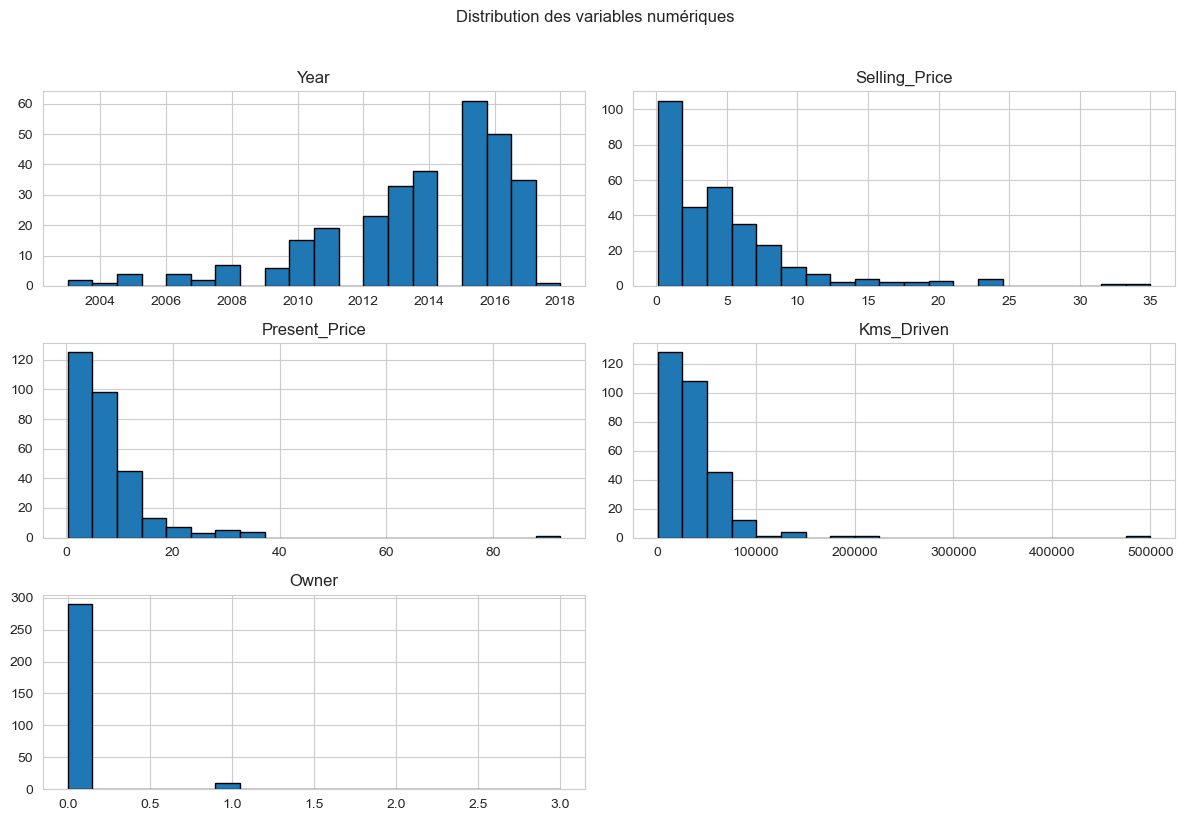

In [26]:
import matplotlib.pyplot as plt

# Histogrammes des variables numériques
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribution des variables numériques", y=1.02)
plt.tight_layout()
plt.show()

## Visualisation avec Seaborn : `catplot`

Le `catplot` est **pertinent** lorsqu’on veut analyser la relation entre :
- une variable **catégorielle** (ex. `Fuel_Type`, `Transmission`, `Seller_Type`) ;
- et une variable **numérique** (ex. `Selling_Price`).

Ici, on compare la distribution du prix de vente selon le type de carburant et la transmission.

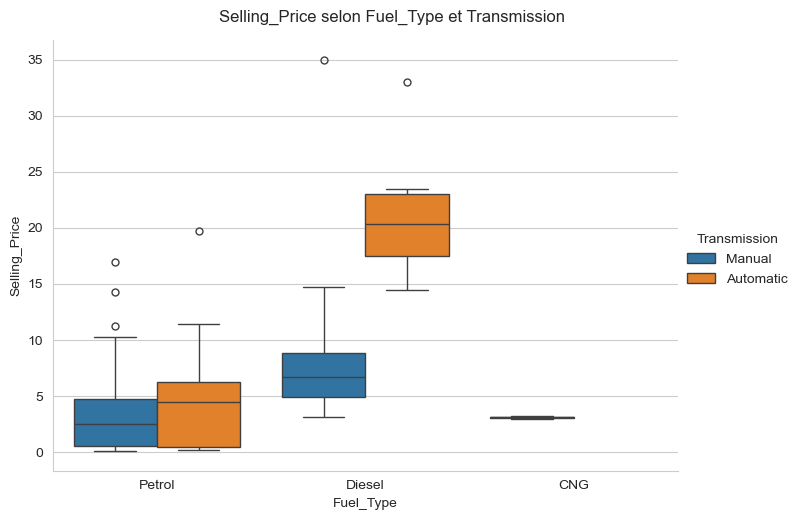

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

g = sns.catplot(
    data=df,
    x="Fuel_Type",
    y="Selling_Price",
    hue="Transmission",
    kind="box",
    height=5,
    aspect=1.4
)

g.fig.suptitle("Selling_Price selon Fuel_Type et Transmission", y=1.03)
plt.show()

### Interprétation du `catplot`

Le tracé `catplot` de type `box` permet de comparer la **distribution de `Selling_Price`** selon des catégories (`Fuel_Type`) et une sous-catégorie (`Transmission`).

- La **ligne au centre** de chaque boîte représente la médiane du prix.
- La **hauteur de la boîte** (IQR) montre la dispersion des prix.
- Les **points extrêmes** indiquent des véhicules atypiques (prix très élevés ou très bas).

Dans ce contexte, ce graphique est pertinent pour :
- comparer rapidement les niveaux de prix entre types de carburant ;
- voir si la transmission (manuelle/automatique) influence le prix au sein d’un même carburant ;
- détecter les groupes les plus hétérogènes et les valeurs aberrantes.

En résumé, le `catplot` est idéal quand on veut analyser une variable numérique en fonction de variables catégorielles.

## 4/ Âge vs prix de vente : corrélation et régression linéaire

Objectif : quantifier la relation entre l’**âge** de la voiture et son **prix de vente**.

- On crée la variable `Age = 2017 - Year`.
- On calcule la **corrélation de Pearson** entre `Age` et `Selling_Price`.
- On ajuste une **régression linéaire simple** (`Selling_Price ~ Age`).
- On visualise avec Matplotlib :
  - un nuage de points + droite de régression ;
  - une matrice de corrélation (Pearson) sur les variables numériques.

Rappel (veille rapide) : la régression linéaire est pertinente si la relation est approximativement linéaire, avec résidus sans structure forte et variance relativement stable.

Année de référence : 2017
Corrélation de Pearson (Age, Selling_Price) : -0.2361
Pente (coefficient) : -0.4151
Intercept : 6.0610
R² : 0.0558


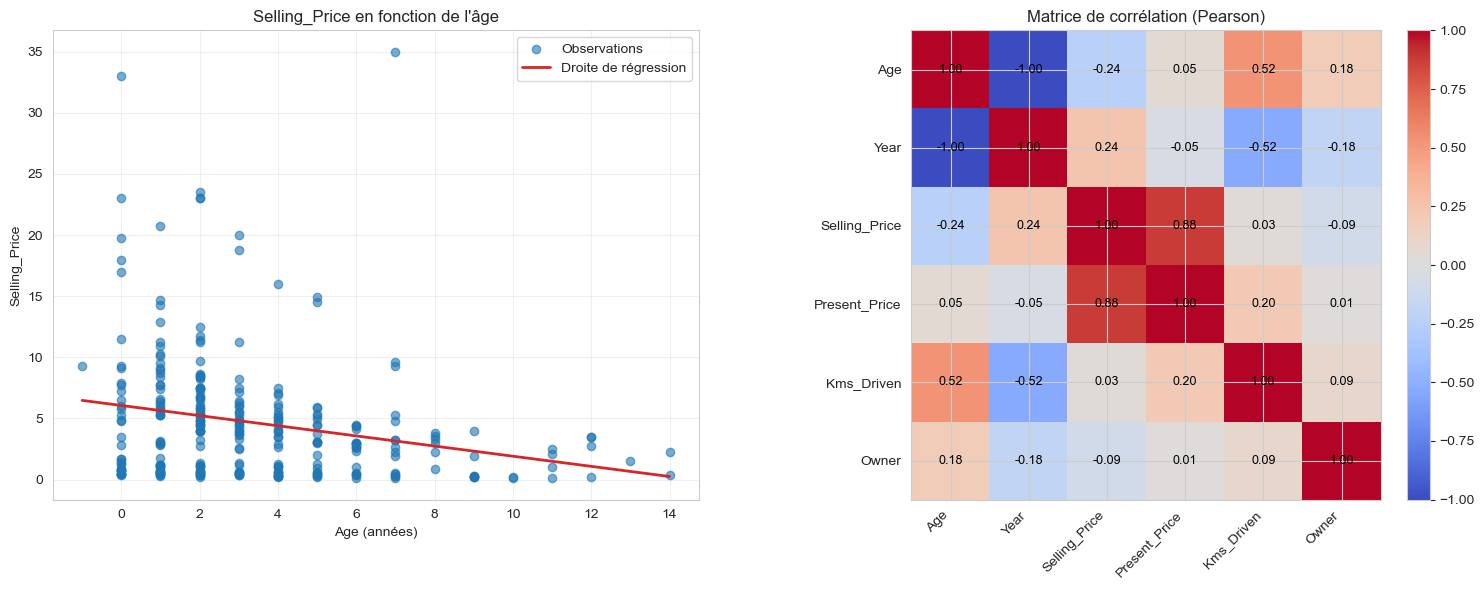

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1) Création de la variable âge (année de référence fixe)
reference_year = 2017
df["Age"] = reference_year - df["Year"]

# 2) Corrélation de Pearson (Age vs Selling_Price)
pearson_age_price = df["Age"].corr(df["Selling_Price"], method="pearson")

# 3) Régression linéaire simple : Selling_Price ~ Age
X = df[["Age"]].values
y = df["Selling_Price"].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = model.score(X, y)
slope = model.coef_[0]
intercept = model.intercept_

print(f"Année de référence : {reference_year}")
print(f"Corrélation de Pearson (Age, Selling_Price) : {pearson_age_price:.4f}")
print(f"Pente (coefficient) : {slope:.4f}")
print(f"Intercept : {intercept:.4f}")
print(f"R² : {r2:.4f}")

# 4) Visualisations Matplotlib
numeric_cols = ["Age", "Year", "Selling_Price", "Present_Price", "Kms_Driven", "Owner"]
numeric_cols = [col for col in numeric_cols if col in df.columns]
corr_matrix = df[numeric_cols].corr(method="pearson")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# a) Scatter + droite de régression
axes[0].scatter(df["Age"], df["Selling_Price"], alpha=0.6, color="tab:blue", label="Observations")
order = np.argsort(df["Age"].values)
axes[0].plot(df["Age"].values[order], y_pred[order], color="tab:red", linewidth=2, label="Droite de régression")
axes[0].set_title("Selling_Price en fonction de l'âge")
axes[0].set_xlabel("Age (années)")
axes[0].set_ylabel("Selling_Price")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# b) Matrice de corrélation Pearson (Matplotlib)
im = axes[1].imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
axes[1].set_xticks(range(len(corr_matrix.columns)))
axes[1].set_yticks(range(len(corr_matrix.columns)))
axes[1].set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
axes[1].set_yticklabels(corr_matrix.columns)
axes[1].set_title("Matrice de corrélation (Pearson)")

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        axes[1].text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", fontsize=9)

fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

### Interprétation des valeurs obtenues

Avec une année de référence fixée à **2017** (`Age = 2017 - Year`) :

- **Corrélation de Pearson (`-0.2361`)** : relation **négative faible** entre l’âge et le prix de vente. En moyenne, les voitures plus anciennes se vendent moins cher, mais l’effet reste limité.
- **Pente (`-0.4151`)** : quand l’âge augmente de 1 an, le `Selling_Price` estimé diminue en moyenne d’environ **0.42** (dans l’unité du dataset, souvent en lakhs).
- **Intercept (`6.0610`)** : prix prédit pour `Age = 0` (voiture de l’année 2017). Cette valeur sert surtout au calcul de la droite.
- **R² (`0.0558`)** : l’âge seul explique environ **5.6 %** de la variabilité du prix, donc pouvoir explicatif faible.

Conclusion : l’âge influence le prix, mais **ne suffit pas** à lui seul pour bien prédire `Selling_Price`. Il faut ajouter d’autres variables (`Present_Price`, `Kms_Driven`, `Fuel_Type`, `Transmission`, etc.).

## 5 Régression linéaire univariée 

In [29]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Régression linéaire univariée avec une année de référence fixe
reference_year = 2017
df["Age"] = reference_year - df["Year"]

x = df["Age"].values
y = df["Selling_Price"].values

# 1) SciPy
scipy_result = linregress(x, y)
scipy_slope = scipy_result.slope
scipy_intercept = scipy_result.intercept
scipy_r = scipy_result.rvalue
scipy_r2 = scipy_r**2

# 2) Scikit-Learn
X = x.reshape(-1, 1)
sk_model = LinearRegression()
sk_model.fit(X, y)
sk_slope = sk_model.coef_[0]
sk_intercept = sk_model.intercept_
sk_r2 = sk_model.score(X, y)

print("=== Régression linéaire univariée : Age -> Selling_Price ===")
print(f"Année de référence : {reference_year}")
print("\n[Scipy - linregress]")
print(f"Pente : {scipy_slope:.4f}")
print(f"Intercept : {scipy_intercept:.4f}")
print(f"r : {scipy_r:.4f}")
print(f"R² : {scipy_r2:.4f}")
print(f"p-value : {scipy_result.pvalue:.4e}")

print("\n[Scikit-Learn - LinearRegression]")
print(f"Pente : {sk_slope:.4f}")
print(f"Intercept : {sk_intercept:.4f}")
print(f"R² : {sk_r2:.4f}")

print("\n[Comparaison Scipy vs Scikit-Learn]")
print(f"Écart pente : {abs(scipy_slope - sk_slope):.8f}")
print(f"Écart intercept : {abs(scipy_intercept - sk_intercept):.8f}")
print(f"Écart R² : {abs(scipy_r2 - sk_r2):.8f}")

=== Régression linéaire univariée : Age -> Selling_Price ===
Année de référence : 2017

[Scipy - linregress]
Pente : -0.4151
Intercept : 6.0610
r : -0.2361
R² : 0.0558
p-value : 3.4955e-05

[Scikit-Learn - LinearRegression]
Pente : -0.4151
Intercept : 6.0610
R² : 0.0558

[Comparaison Scipy vs Scikit-Learn]
Écart pente : 0.00000000
Écart intercept : 0.00000000
Écart R² : 0.00000000


## 6/ Régression linéaire multiple (Kms_Driven + Transmission)

Objectif : améliorer le modèle en utilisant **deux variables d'entrée** :
- `Kms_Driven` (numérique)
- `Transmission` (catégorielle, encodée en binaire)

On entraîne un modèle `LinearRegression` avec `sklearn` puis on évalue les performances sur un jeu de test.

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Variables d'entrée demandées
X_multi = df[["Kms_Driven", "Transmission"]].copy()
y_multi = df["Selling_Price"]

# Encodage de la variable catégorielle Transmission (Manual/Automatic)
X_multi = pd.get_dummies(X_multi, columns=["Transmission"], drop_first=True)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Modèle de régression linéaire multiple
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Prédictions et métriques
y_pred_multi = multi_model.predict(X_test)
r2_multi = r2_score(y_test, y_pred_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print("=== Régression linéaire multiple : Selling_Price ~ Kms_Driven + Transmission ===")
print(f"R² (test)   : {r2_multi:.4f}")
print(f"MAE (test)  : {mae_multi:.4f}")
print(f"RMSE (test) : {rmse_multi:.4f}")

coef_df = pd.DataFrame({
    "Variable": X_multi.columns,
    "Coefficient": multi_model.coef_
}).sort_values(by="Coefficient", key=lambda s: s.abs(), ascending=False)

print("\nCoefficients du modèle :")
print(coef_df)
print(f"\nIntercept : {multi_model.intercept_:.4f}")

=== Régression linéaire multiple : Selling_Price ~ Kms_Driven + Transmission ===
R² (test)   : 0.1084
MAE (test)  : 3.4027
RMSE (test) : 4.5320

Coefficients du modèle :
              Variable  Coefficient
1  Transmission_Manual    -5.912256
0           Kms_Driven    -0.000004

Intercept : 9.9771


## 7 Évaluation des modèles de régression (qualité)

Pour répondre au point 7, on compare **deux modèles** sur le **même jeu de test** :
- Modèle 1 (univarié) : `Selling_Price ~ Age`
- Modèle 2 (multiple) : `Selling_Price ~ Kms_Driven + Transmission`

Mesures utilisées : `MAE`, `MSE`, `RMSE`, `R²` et `R² ajusté`.

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cible
y_all = df["Selling_Price"]

# -------- Modèle 1 : univarié (Age) --------
reference_year = 2017
X_uni = pd.DataFrame({"Age": reference_year - df["Year"]})

X_uni_train, X_uni_test, y_train, y_test = train_test_split(
    X_uni, y_all, test_size=0.2, random_state=42
)

uni_model = LinearRegression()
uni_model.fit(X_uni_train, y_train)
y_pred_uni = uni_model.predict(X_uni_test)

# -------- Modèle 2 : multiple (Kms_Driven + Transmission) --------
X_multi_eval = df[["Kms_Driven", "Transmission"]].copy()
X_multi_eval = pd.get_dummies(X_multi_eval, columns=["Transmission"], drop_first=True)

X_mul_train, X_mul_test, y_train2, y_test2 = train_test_split(
    X_multi_eval, y_all, test_size=0.2, random_state=42
)

multi_model_eval = LinearRegression()
multi_model_eval.fit(X_mul_train, y_train2)
y_pred_mul = multi_model_eval.predict(X_mul_test)

# Fonctions métriques
def adjusted_r2_score(r2, n_samples, n_features):
    if n_samples <= n_features + 1:
        return np.nan
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

def compute_metrics(y_true, y_pred, n_features):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    r2_adj = adjusted_r2_score(r2, len(y_true), n_features)
    return mae, mse, rmse, r2, r2_adj

mae_uni, mse_uni, rmse_uni, r2_uni, r2adj_uni = compute_metrics(
    y_test, y_pred_uni, X_uni_test.shape[1]
)
mae_mul, mse_mul, rmse_mul, r2_mul, r2adj_mul = compute_metrics(
    y_test2, y_pred_mul, X_mul_test.shape[1]
)

results_df = pd.DataFrame([
    {
        "Modèle": "Univarié (Age)",
        "MAE": mae_uni,
        "MSE": mse_uni,
        "RMSE": rmse_uni,
        "R²": r2_uni,
        "R² ajusté": r2adj_uni
    },
    {
        "Modèle": "Multiple (Kms_Driven + Transmission)",
        "MAE": mae_mul,
        "MSE": mse_mul,
        "RMSE": rmse_mul,
        "R²": r2_mul,
        "R² ajusté": r2adj_mul
    }
])

print("=== Évaluation des modèles de régression ===")
display(results_df.round(4))

=== Évaluation des modèles de régression ===


,Modèle,MAE,MSE,RMSE,R²,R² ajusté
0,Univarié (Age),3.2033,20.9997,4.5825,0.0884,0.0729
1,Multiple (Kms_Driven + Transmission),3.4027,20.5386,4.5320,0.1084,0.0777


### Interprétation des résultats d’évaluation

Comparaison des deux modèles sur le jeu de test :

- **Univarié (Age)** : `R² = 0.0884`, `R² ajusté = 0.0729`, `RMSE = 4.5825`, `MAE = 3.2033`.
- **Multiple (Kms_Driven + Transmission)** : `R² = 0.1084`, `R² ajusté = 0.0777`, `RMSE = 4.5320`, `MAE = 3.4027`.

Lecture :
- Le modèle multiple est **légèrement meilleur globalement** sur `R²` et `RMSE` (il explique un peu plus de variance et réduit un peu l’erreur quadratique).
- En revanche, son `MAE` est un peu plus élevé : les erreurs absolues moyennes ne s’améliorent pas sur tous les points.
- L’amélioration reste **faible** dans les deux cas (`R²` proche de 0.10), ce qui indique que ces variables seules ne suffisent pas pour bien prédire `Selling_Price`.

Conclusion :
- Le modèle multiple est à privilégier ici, mais pour une vraie amélioration il faut enrichir les variables explicatives (ex. `Present_Price`, `Fuel_Type`, `Owner`, `Year/Age`, etc.).

## 8 Conclusion générale de l’analyse

À partir des analyses univariées et multivariées, on peut conclure que :

- **L’âge** a un effet négatif sur le prix de vente : plus une voiture est ancienne, plus son prix tend à diminuer (relation présente mais faible).
- **La transmission** contribue au prix : dans notre modèle, la modalité *Manual* est associée à un prix plus faible que la modalité de référence (*Automatic*).
- **Le kilométrage (`Kms_Driven`)** a aussi un effet négatif, mais modéré dans ce modèle.
- Le facteur le plus fortement lié au prix dans les variables observées reste **`Present_Price`** (corrélation élevée avec `Selling_Price`, autour de `0.88`).

Sur la qualité prédictive :
- Le modèle multiple (`Kms_Driven + Transmission`) améliore légèrement `R²` par rapport au modèle univarié,
- mais les scores globaux restent modestes (`R²` faible), ce qui indique qu’une partie importante de la variabilité du prix n’est pas encore expliquée.

En pratique, pour mieux estimer le prix d’une voiture, il faut enrichir le modèle avec davantage de variables pertinentes (`Present_Price`, `Fuel_Type`, `Owner`, `Age/Year`, état du véhicule, marque/modèle, etc.).

## 9 Estimation du prix pour Martin

Profil demandé :
- âge **< 7 ans** (on prend ici un cas conforme à **6 ans**)
- kilométrage **≤ 100 000 km** (on prend **100 000 km**)
- boîte **manuelle**

Méthode : entraînement d’une régression linéaire multiple avec `Age`, `Kms_Driven` et `Transmission`, puis prédiction sur ce profil.

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1) Préparation des données pour le modèle de prédiction
reference_year = 2017
df["Age"] = reference_year - df["Year"]

X_martin = df[["Age", "Kms_Driven", "Transmission"]].copy()
y_martin = df["Selling_Price"]

X_martin_enc = pd.get_dummies(X_martin, columns=["Transmission"], drop_first=True)

# 2) Entraînement du modèle multiple sur toutes les données
model_martin = LinearRegression()
model_martin.fit(X_martin_enc, y_martin)

# 3) Profil Martin (conforme aux critères)
martin_profile = pd.DataFrame([
    {
        "Age": 6,
        "Kms_Driven": 100000,
        "Transmission": "Manual"
    }
])

martin_profile_enc = pd.get_dummies(martin_profile, columns=["Transmission"], drop_first=True)
martin_profile_enc = martin_profile_enc.reindex(columns=X_martin_enc.columns, fill_value=0)

# 4) Prédiction
martin_price_pred = model_martin.predict(martin_profile_enc)[0]

print("=== Estimation du prix pour Martin ===")
print("Hypothèses : Age=6 ans, Kms_Driven=100000, Transmission=Manual")
print(f"Prix estimé (Selling_Price) : {martin_price_pred:.2f}")

=== Estimation du prix pour Martin ===
Hypothèses : Age=6 ans, Kms_Driven=100000, Transmission=Manual
Prix estimé (Selling_Price) : 8.83


### Interprétation de l’estimation pour Martin

Le modèle prédit un **prix de vente estimé à ~8.83** (même unité que `Selling_Price` dans le dataset).

Comment lire ce résultat :
- Cette valeur est une **estimation moyenne** pour un véhicule avec `Age = 6`, `Kms_Driven = 100000`, `Transmission = Manual`.
- Ce n’est **pas un prix garanti** : le prix réel peut varier selon la marque, l’état du véhicule, l’entretien, les options, le carburant et le marché local.
- Les performances globales du modèle restant modestes (`R²` faible), il faut interpréter ce prix comme un **ordre de grandeur**.

Conseil pratique : utiliser cette estimation comme **point de départ de négociation**, puis affiner avec des variables supplémentaires (`Present_Price`, `Fuel_Type`, `Owner`, modèle exact du véhicule).

## A l’aide de la librairie Numpy, créez VOTRE Class LinearRegression. N’utilisez pas de fonctions de régression linéaire existante (comme précédemment vue).

##### Descente de gradient (approche iterative)

**Idee :** partir d'un $\theta$ initial et l'ameliorer progressivement pour minimiser l'erreur.

**Fonction cout (MSE)**
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (X\theta - y)^2
$$

**Regle de mise a jour**
$$
\theta \leftarrow \theta - \alpha \cdot \frac{1}{m} X^T (X\theta - y)
$$

**Etapes**
- Initialiser $\theta$ (souvent a zero).
- Choisir un taux d'apprentissage $\alpha$.
- Repeter pendant plusieurs iterations :
  - calculer la prediction $X\theta$
  - calculer l'erreur $X\theta - y$
  - mettre a jour $\theta$

**Avantages**
- Fonctionne bien avec beaucoup de features.
- S'adapte aux gros jeux de donnees.

**Inconvenients**
- Il faut regler $\alpha$ et le nombre d'iterations.
- Risque de convergence lente ou instable.